In [7]:
cd ..

/Users/smoon2/Desktop/CMU/Fall25/11755-MLSP/FinalProject/MLSP_Fall25_Project


In [25]:
import numpy as np
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
from mir_eval.separation import bss_eval_sources
from sklearn.metrics import mean_squared_error

from utils import load_and_preprocess

In [42]:
gt_vocal_path = 'data/vocal_trimmed.wav'
gt_inst_path = 'data/inst_trimmed.wav'

est_vocal_paths = [
    'output/ICA/component_1_vocal_norm.wav',
    'output/NMF/component_0_vocal.wav',
]
est_inst_paths = [
    'output/ICA/component_0_inst_norm.wav',
    'output/NMF/component_1_inst.wav',
]

In [43]:
sr, gt_vocal, gt_inst, est_vocals, est_insts = load_and_preprocess(
    gt_vocal_path, gt_inst_path, est_vocal_paths, est_inst_paths
)

[GT] Sample rate: 44100, Vocal len: 2293628, Inst len: 2293628
Loading estimated vocal: output/ICA/component_1_vocal_norm.wav, instrumental: output/ICA/component_0_inst_norm.wav ...
[Est] Sample rate: 44100, Vocal len: 2245568, Inst len: 2245568
Loading estimated vocal: output/NMF/component_0_vocal.wav, instrumental: output/NMF/component_1_inst.wav ...
[Est] Sample rate: 44100, Vocal len: 2245120, Inst len: 2245120
Common sample rate: 44100, common length: 2245120


In [44]:
import warnings
warnings.filterwarnings("ignore")
methods = ['ICA', 'NMF']
rows = []

for i, (est_vocal, est_inst) in enumerate(zip(est_vocals, est_insts)):

    # Compute metrics
    SDR_v, SIR_v, SAR_v, _ = bss_eval_sources(gt_vocal, est_vocal)
    SDR_i, SIR_i, SAR_i, _ = bss_eval_sources(gt_inst, est_inst)

    # Compute MSE
    MSE_v = mean_squared_error(gt_vocal, est_vocal)
    MSE_i = mean_squared_error(gt_inst, est_inst)

    rows.append({
        'Method': methods[i],
        'Source': 'Vocal',
        'SDR': SDR_v[0],
        'SAR': SAR_v[0],
        'SIR': SIR_v[0],
        'MSE': MSE_v
    })
    rows.append({
        'Method': methods[i],
        'Source': 'Instrumental',
        'SDR': SDR_i[0],
        'SAR': SAR_i[0],
        'SIR': SIR_i[0],
        'MSE': MSE_i
    })

df_results = pd.DataFrame(rows)
print(df_results)

  Method        Source        SDR        SAR  SIR       MSE
0    ICA         Vocal  -6.951034  -6.951034  inf  0.063479
1    ICA  Instrumental -20.022453 -20.022453  inf  0.044662
2    NMF         Vocal -13.095684 -13.095684  inf  0.037093
3    NMF  Instrumental -15.354281 -15.354281  inf  0.043217


In [45]:
df_results.drop(columns=['SIR'], inplace=True)

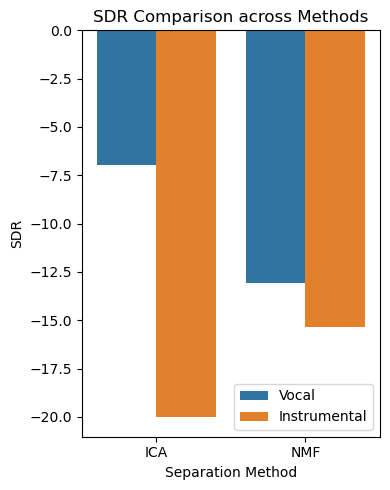

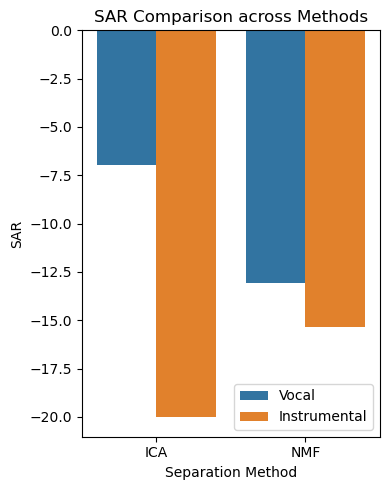

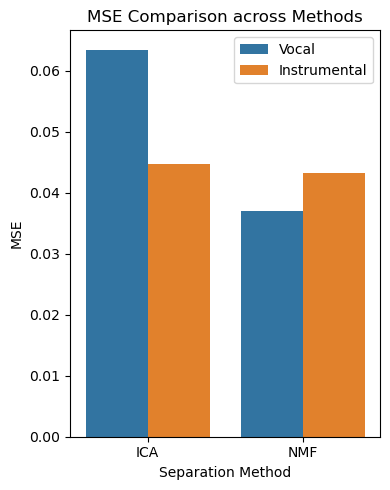

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['SDR', 'SAR', 'MSE']

for metric in metrics:
    plt.figure(figsize=(4, 5))
    sns.barplot(data=df_results, x='Method', y=metric, hue='Source')
    plt.title(f'{metric} Comparison across Methods')
    plt.ylabel(metric)
    plt.xlabel('Separation Method')
    plt.legend(loc=None)
    plt.tight_layout()
    plt.show()
